<h1>Text Classification using Naive Bayes<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Naive-Bayes-Theory" data-toc-modified-id="Naive-Bayes-Theory-2">Naive Bayes Theory</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Bayesian-Decision-Theory" data-toc-modified-id="Bayesian-Decision-Theory-2.0.1">Bayesian Decision Theory</a></span></li><li><span><a href="#Probability" data-toc-modified-id="Probability-2.0.2">Probability</a></span></li><li><span><a href="#Conditional-Probability" data-toc-modified-id="Conditional-Probability-2.0.3">Conditional Probability</a></span></li><li><span><a href="#Bayes-Rules" data-toc-modified-id="Bayes-Rules-2.0.4">Bayes Rules</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-2.0.5">Naive Bayes</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning-Project-Lifecycle:-First-Iteration" data-toc-modified-id="Machine-Learning-Project-Lifecycle:-First-Iteration-3">Machine Learning Project Lifecycle: First Iteration</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-3.1">Problem Statement</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-3.2">Training Data</a></span></li><li><span><a href="#Preprocessing-+-Feature-Engineering" data-toc-modified-id="Preprocessing-+-Feature-Engineering-3.3">Preprocessing + Feature Engineering</a></span></li><li><span><a href="#Machine-Learning-Algorithm:-Naive-Bayes" data-toc-modified-id="Machine-Learning-Algorithm:-Naive-Bayes-3.4">Machine Learning Algorithm: Naive Bayes</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.5">Modeling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-3.6">Model Evaluation</a></span></li><li><span><a href="#Quality-Metrics" data-toc-modified-id="Quality-Metrics-3.7">Quality Metrics</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-4">Homework</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-5">Resources</a></span></li></ul></div>

## Introduction

<img src="../images/classification.png" alt="Classification" style="width: 700px;"/>

## Naive Bayes Theory

#### Bayesian Decision Theory

Theory of choosing a class which has the higher probability out of the given classes. It allows prior knowledge and logic to

- $ p1(x, y) > p2(x, y) $ then the result will be class 1
- $ p1(x, y) < p2(x, y) $ then the result will be class 2

#### Probability

Probability is a numerical description of how likely an event is to occur or how likely it is that a proposition is true.

*Examples:*

Given a Programming Languages preferences as following:

- Clojure -> 8
- Python -> 8
- Javascript -> 2

*Q) What is the probability that a given problem will be implemented in Clojure?*

*Q) What is the probability that a given problem will be implemented in Python?*

*Q) What is the probability that a given problem will be implemented in Javascript?*

#### Conditional Probability

The conditional probability of an event B is the probability that the event will occur given the knowledge that an event A has already occurred.

$$p(x | c) = p(x {\displaystyle \cap } c) / p(c) $$

Examples:

**Given the following Programming Language perferences by devs from different team:**

- Backend Team -> Clojure = 5, Python 4
- Frontend Team -> Python = 4, Javascript = 2, Clojure is 3

Q) What is the probability that a Dev from Backend team will choose Clojure to solve the problem?

Q) What is the probability that a Dev from Frontend team will choose Javascript to solve the problem?

#### Bayes Rules

If $p(x | c)$ is given or known, $p(c | x)$ can be found using following formula:

$$ p(c|x) =  p(c) * p(x|c) \: / \: p(x) $$

Same equation can written as 

$$ p(c|x) = Prior Probability * Likelihood \: / \: Test Evidence $$


$ x ^ 2 + y ^ 2 = z ^ 2$

$$ x ^ 2 + y ^ 2 = z ^ 2$$

\begin{equation}
x ^ 2 + y ^ 2 = z ^ 2
\end{equation}

\begin{equation}
p(c|x) = (Prior * Evidence)  /  p(x)
\end{equation}

#### Naive Bayes

Simple algorithm which works well with small datasets & takes very less time to train. It can also handle multiple classes.

**Assumptions**

- Assumes that presence of a particular feature in a class is unrelated to the presence of any other feature.
- Order of words in the sentence doesnt matter.

**Example**



## Machine Learning Project Lifecycle: First Iteration

### Problem Statement

Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.

**Product Categories**

- Credit reporting, repair, or other
- Debt collection
- Student loan
- Money transfer, virtual currency, or money service
- Bank account or service

### Training Data

[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [1]:
import pandas as pd

In [2]:
complaints_dataset = pd.read_csv('../datasets/consumer_complaints_dataset.csv')

In [3]:
complaints_dataset.head()

,Product,Complaint_text
0,"Credit reporting, repair, or other",The Summer of XX/XX/2018 I was denied a mortga...
1,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...
2,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...
3,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...
4,"Credit reporting, repair, or other",There are many mistakes appear in my report wi...


In [4]:
complaints_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254350 entries, 0 to 254349
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Product         254350 non-null  object
 1   Complaint_text  254350 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


**Q) What is the distribution of complaints for each product type?**

In [78]:
complaints_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [5]:
complaints_dataset\
    .groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
"Credit reporting, repair, or other",123966
Debt collection,86710
Student loan,21810
Bank account or service,14885
"Money transfer, virtual currency, or money service",6979


**Q) Find out the Occurances of Duplicate Text messages?**

In [6]:
complaints_dataset['Complaint_text'].nunique()

238121

In [7]:
duplicate_complaints = complaints_dataset['Complaint_text']\
    .value_counts()\
    [complaints_dataset['Complaint_text'].value_counts() > 2].index

In [8]:
len(duplicate_complaints)

3354

**Extract Mini Dataset with Equal number of examples in each Product class**

In [9]:
dataset_indexes = []
for product in complaints_dataset['Product'].unique():
    indexes = complaints_dataset[complaints_dataset.Product == product]\
    .sample(4000, random_state=19).index
    dataset_indexes.extend(indexes)

In [10]:
mini_complaints_dataset = complaints_dataset.loc[dataset_indexes].copy()

In [11]:
mini_complaints_dataset.shape

(20000, 2)

In [12]:
mini_complaints_dataset.groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


### Preprocessing + Feature Engineering

**Bag of Words**

Simple technique to convert collection of text documents to a matrix of token counts. [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) is the implementaiton of this technique in SKLearn which provides alot of parameters for tunning.

<img src="../images/bag_of_words_example.jpeg" alt="Bag of Words Example" style="width: 500px;"/>

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19

**`CountVectorizer` Examples**

In [17]:
example_dataset = [
    "Today is Thursday.",
    "Second session of Machine Learning Series",
    "Machine Learning uses Stats methods to learn from data. Stats is awesome",
]

In [18]:
example_vectorizer = CountVectorizer(binary=True)
transformed_data = example_vectorizer.fit_transform(example_dataset)

In [19]:
print(example_vectorizer.get_feature_names())

['awesome', 'data', 'from', 'is', 'learn', 'learning', 'machine', 'methods', 'of', 'second', 'series', 'session', 'stats', 'thursday', 'to', 'today', 'uses']


In [20]:
example_vectorizer.vocabulary_

{'today': 15,
 'is': 3,
 'thursday': 13,
 'second': 9,
 'session': 11,
 'of': 8,
 'machine': 6,
 'learning': 5,
 'series': 10,
 'uses': 16,
 'stats': 12,
 'methods': 7,
 'to': 14,
 'learn': 4,
 'from': 2,
 'data': 1,
 'awesome': 0}

In [21]:
transformed_data.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]])

**Split the Data into Train & Test Sets**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    mini_complaints_dataset['Complaint_text'],
    mini_complaints_dataset['Product'],
    test_size=.2,
    stratify=mini_complaints_dataset['Product'],
    random_state = RANDOM_STATE)

In [15]:
y_train.value_counts()

Student loan                                          3200
Debt collection                                       3200
Bank account or service                               3200
Credit reporting, repair, or other                    3200
Money transfer, virtual currency, or money service    3200
Name: Product, dtype: int64

In [16]:
y_test.value_counts()

Student loan                                          800
Bank account or service                               800
Credit reporting, repair, or other                    800
Money transfer, virtual currency, or money service    800
Debt collection                                       800
Name: Product, dtype: int64

**Preprocessing + Feature Eng. of the Dataset**

In [22]:
binary_count_vectorizer = CountVectorizer(binary=True, stop_words='english')

In [23]:
X_train_binary_count_vectorizer = binary_count_vectorizer.fit_transform(X_train)

In [24]:
X_test_binary_count_vectorizer = binary_count_vectorizer.transform(X_test)

In [25]:
X_train_binary_count_vectorizer.shape, X_test_binary_count_vectorizer.shape

((16000, 24253), (4000, 24253))

In [26]:
binary_count_vectorizer.get_feature_names()[:10]

['00', '000', '0001', '001', '0010', '00109', '004', '00i', '01', '014']

In [27]:
binary_count_vectorizer.vocabulary_

{'xxxx': 23870,
 'account': 1264,
 'listed': 12934,
 'credit': 5847,
 'report': 18089,
 'experian': 8616,
 'paid': 15420,
 'closed': 4699,
 '2007': 316,
 'like': 12884,
 'removed': 17959,
 'years': 24179,
 'employer': 7949,
 'submitted': 20596,
 'incorrect': 11389,
 'information': 11571,
 'hsa': 10867,
 'bank': 2995,
 'subsidiary': 20629,
 'webster': 23415,
 'money': 14021,
 'deducted': 6314,
 'paycheck': 15611,
 '15': 141,
 'days': 6155,
 'hired': 10690,
 'refusing': 17693,
 'release': 17849,
 'funds': 9757,
 'corrected': 5640,
 'requested': 18186,
 'verifying': 23042,
 'identity': 11020,
 'social': 19889,
 'security': 19170,
 'number': 14713,
 'began': 3183,
 'disputing': 7212,
 'items': 12217,
 'bureaus': 3841,
 'xx': 23868,
 'sent': 19261,
 'follow': 9343,
 'letters': 12801,
 'believe': 3227,
 'public': 16890,
 'records': 17518,
 'reporting': 18098,
 'accurately': 1326,
 'compliance': 5057,
 'fcra': 8951,
 'fdcpa': 8960,
 'received': 17384,
 'didnt': 6848,
 'say': 18958,
 'company'

**Inspect the Feature Matrix**

In [28]:
X_train_array = X_train_binary_count_vectorizer.toarray()

In [29]:
def raw_text_to_vocab(text_index):
    print(X_train.iloc[text_index])
    for index, exists in enumerate(X_train_array[text_index]):
        if exists:
            print(index, '->', binary_count_vectorizer.get_feature_names()[index])

In [30]:
raw_text_to_vocab(0)

XXXX account listed on my credit report with Experian and XXXX has been paid and closed since XXXX 2007. I would like this account removed from my credit report as it has been over 7 years.
316 -> 2007
1264 -> account
4699 -> closed
5847 -> credit
8616 -> experian
12884 -> like
12934 -> listed
15420 -> paid
17959 -> removed
18089 -> report
23870 -> xxxx
24179 -> years


**Q) Which Words are common in different classes of products?**

**Q) Which Words are specifically used in respective product classes?**

### Machine Learning Algorithm: Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB

In [32]:
nb_classifer = MultinomialNB()

### Modeling

In [33]:
nb_classifer.fit(X_train_binary_count_vectorizer, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
nb_classifer.alpha

1.0

In [35]:
nb_classifer.class_count_

array([3200., 3200., 3200., 3200., 3200.])

In [36]:
nb_classifer.class_log_prior_

array([-1.60943791, -1.60943791, -1.60943791, -1.60943791, -1.60943791])

In [70]:
nb_classifer.feature_log_prob_

array([[ -4.95098841, -10.24868058, -12.32812212, ..., -12.32812212,
        -12.32812212, -12.32812212],
       [ -5.82451152, -10.18548475, -11.97724422, ..., -11.28409704,
        -11.97724422, -11.97724422],
       [ -5.23795246, -10.00012639, -12.07956794, ..., -12.07956794,
        -11.38642076, -12.07956794],
       [ -4.85719732,  -9.28801412, -12.2837464 , ..., -12.2837464 ,
        -12.2837464 , -12.2837464 ],
       [ -5.22129019,  -8.61371908, -11.65824152, ..., -12.3513887 ,
        -12.3513887 , -11.65824152]])

In [73]:
nb_classifer.coef_

array([[ -4.95098841, -10.24868058, -12.32812212, ..., -12.32812212,
        -12.32812212, -12.32812212],
       [ -5.82451152, -10.18548475, -11.97724422, ..., -11.28409704,
        -11.97724422, -11.97724422],
       [ -5.23795246, -10.00012639, -12.07956794, ..., -12.07956794,
        -11.38642076, -12.07956794],
       [ -4.85719732,  -9.28801412, -12.2837464 , ..., -12.2837464 ,
        -12.2837464 , -12.2837464 ],
       [ -5.22129019,  -8.61371908, -11.65824152, ..., -12.3513887 ,
        -12.3513887 , -11.65824152]])

In [72]:
nb_classifer.intercept_

array([-1.60943791, -1.60943791, -1.60943791, -1.60943791, -1.60943791])

### Model Evaluation

- Cross Validation

<img src="../images/grid_search_cross_validation.png" alt="Cross Validation" style="width: 500px;"/>

In [57]:
from sklearn.model_selection import cross_val_score

In [68]:
cv_scores = cross_val_score(nb_classifer, X_train_binary_count_vectorizer, y_train, cv=5)
print(cv_scores.mean())
print(cv_scores)

0.8534375000000001
[0.8603125 0.8578125 0.845625  0.8590625 0.844375 ]


### Quality Metrics

- **How to calculate the Accuracy of a Model?**
    - Confusion Metrics
    - Accuracy Score Value which is calculated using Correct Classification / Total

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
predictions = nb_classifer.predict(X_test_binary_count_vectorizer)

In [60]:
accuracy_score(y_test, predictions)

0.84675

In [65]:
conf_matrix = confusion_matrix(y_test, predictions, labels=y_test.unique())
conf_matrix

array([[682,  19,  12,  68,  19],
       [ 22, 637,  42,   8,  91],
       [  9,  23, 732,  10,  26],
       [107,   6,   6, 679,   2],
       [ 23,  82,  28,  10, 657]])

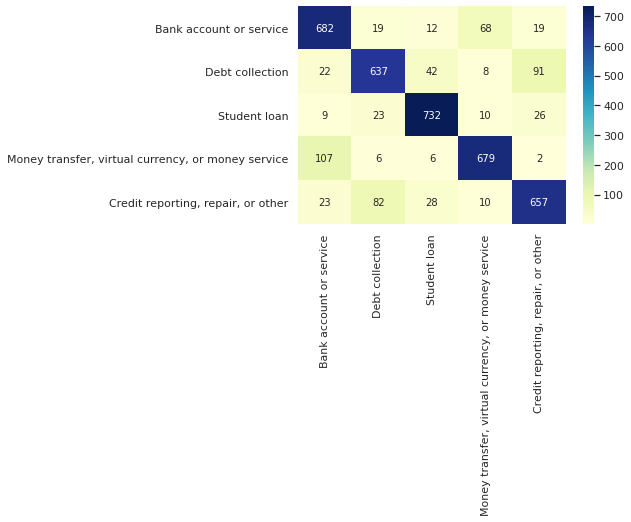

In [77]:
sns.heatmap(conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())

## Homework

- Drop the Complaints which occurs more than 2 times from dataset & see how removing these examples impacts the accuracy?
- Use CountVectorizer with Binary as False & see what impacts it has on the accuracy?
- Fit CountVectorizer without Stopwords & see how impacts the accuracy?
- Identify why there so many misclassifications in `Money transfer, virtual currency, or money service` and `Bank account or service`?

## Resources

- [How to Use CountVectorizer](https://kavita-ganesan.com/how-to-use-countvectorizer/)